✅ Dataset Loaded Successfully

   label                                               text
0      0   @user when a father is dysfunctional and is s...
1      0  @user @user thanks for #lyft credit i can't us...
2      0                                bihday your majesty
3      0  #model   i love u take with u all the time in ...
4      0             factsguide: society now    #motivation

📊 Label Distribution:
label
0    29720
1     2242
Name: count, dtype: int64


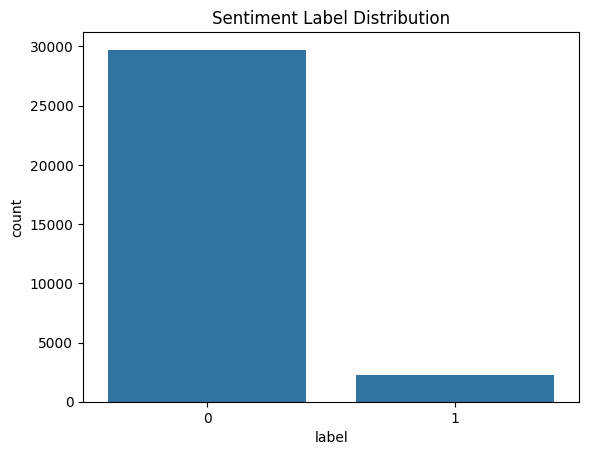

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\banot/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



🔍 Sample Cleaned Text Output:

Original :  @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
Cleaned  : user father dysfunct selfish drag kid dysfunct run
------------------------------------------------------------
Original : @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
Cleaned  : user user thank lyft credit cant use caus dont offer wheelchair van pdx disapoint getthank
------------------------------------------------------------
Original :   bihday your majesty
Cleaned  : bihday majesti
------------------------------------------------------------
Original : #model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  
Cleaned  : model love u take u time urð ðððð ððð
------------------------------------------------------------
Original :  factsguide: society now    #motivation
Cleaned  : factsguid societi motiv
--------------------

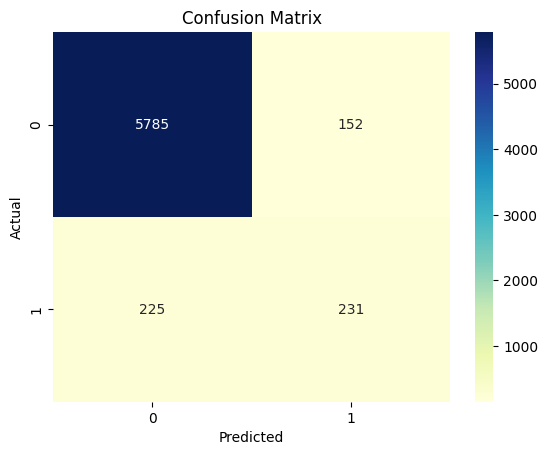


💚 Top 15 Positive Words:
[('user', 1861), ('amp', 268), ('trump', 210), ('â', 202), ('white', 155), ('libtard', 150), ('black', 146), ('like', 142), ('racist', 107), ('polit', 100), ('liber', 93), ('allahsoil', 92), ('peopl', 88), ('hate', 85), ('obama', 81)]

💔 Top 15 Negative Words:
[('user', 15617), ('love', 3021), ('day', 2667), ('ð', 2475), ('happi', 2030), ('â', 1595), ('thank', 1488), ('amp', 1315), ('get', 1201), ('time', 1190), ('u', 1109), ('im', 1094), ('life', 1093), ('go', 1091), ('today', 1049)]


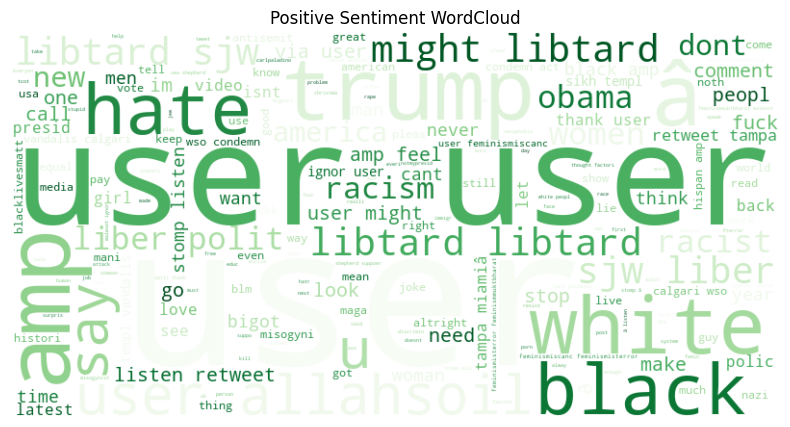

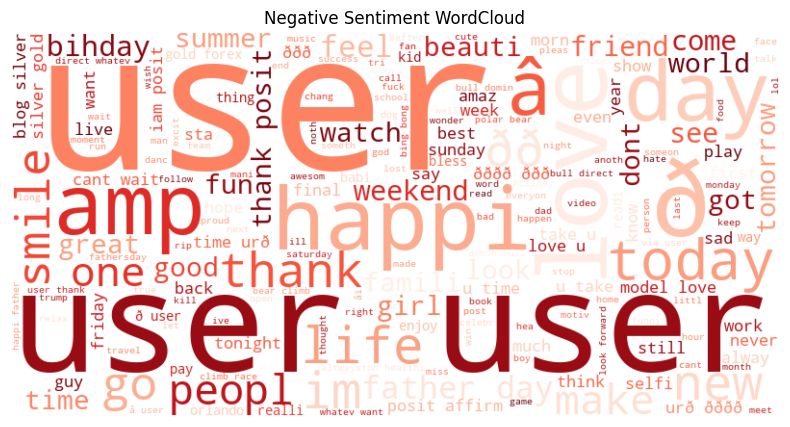

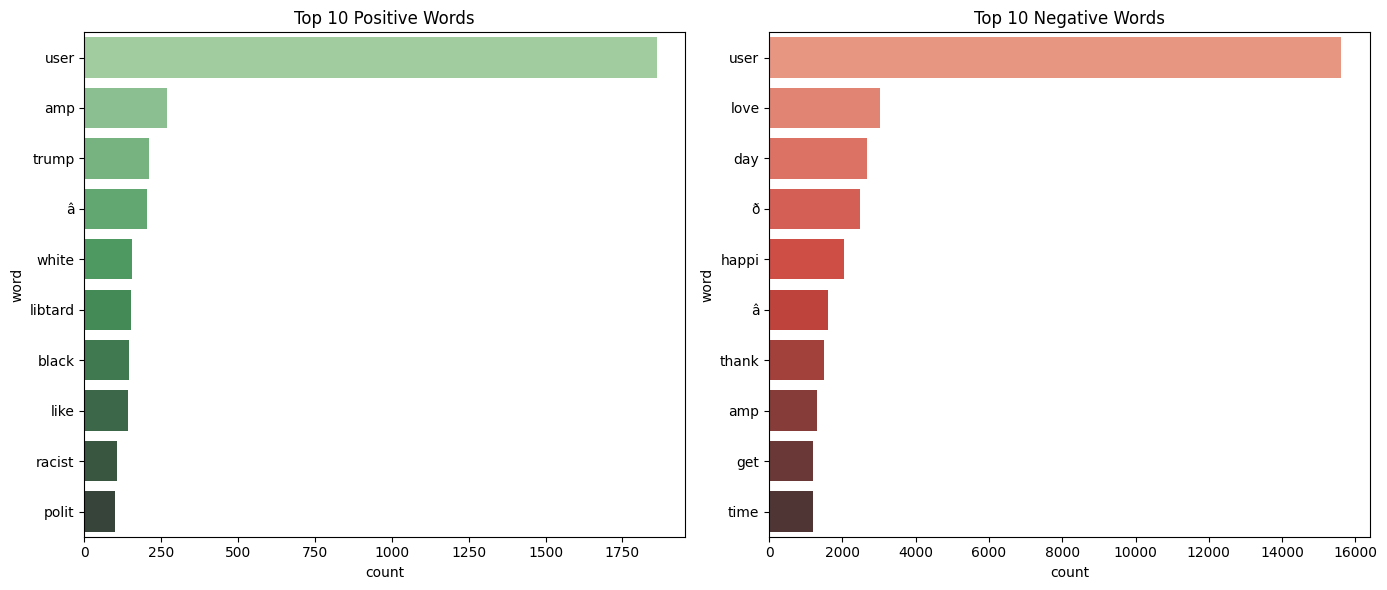

In [7]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Load Dataset
df = pd.read_csv('Downloads/train.csv')
df = df[['label', 'tweet']]
df.columns = ['label', 'text']
print("✅ Dataset Loaded Successfully\n")
print(df.head())

# 3. Label Distribution
print("\n📊 Label Distribution:")
print(df['label'].value_counts())
sns.countplot(x='label', data=df)
plt.title("Sentiment Label Distribution")
plt.savefig('task4_label_plot.jpg')
plt.show()

# 4. Download NLTK Stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# 5. Text Cleaning Function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = ''.join([char for char in text if char not in string.punctuation])
    tokens = text.split()
    filtered = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(filtered)

# 6. Apply Cleaning
df['cleaned_text'] = df['text'].apply(clean_text)

# 7. Show Sample Original vs Cleaned Text
print("\n🔍 Sample Cleaned Text Output:\n")
for i in range(5):
    print(f"Original : {df['text'].iloc[i]}")
    print(f"Cleaned  : {df['cleaned_text'].iloc[i]}")
    print("-" * 60)

# 8. Vectorize Text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['label']

# 9. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 10. Train Model
model = MultinomialNB()
model.fit(X_train, y_train)

# 11. Predict and Evaluate
y_pred = model.predict(X_test)
print("\n📈 Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# 12. Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('task4_con_matrix.jpg')
plt.show()

# 13. Word Frequency Analysis
positive_words = ' '.join(df[df['label'] == 1]['cleaned_text']).split()
negative_words = ' '.join(df[df['label'] == 0]['cleaned_text']).split()
positive_freq = Counter(positive_words)
negative_freq = Counter(negative_words)

print("\n💚 Top 15 Positive Words:")
print(positive_freq.most_common(15))

print("\n💔 Top 15 Negative Words:")
print(negative_freq.most_common(15))

# 14. WordClouds
pos_cloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(' '.join(positive_words))
plt.figure(figsize=(10,5))
plt.imshow(pos_cloud, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Sentiment WordCloud")
plt.savefig('task4_pos_word.jpg')
plt.show()

neg_cloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(' '.join(negative_words))
plt.figure(figsize=(10,5))
plt.imshow(neg_cloud, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Sentiment WordCloud")
plt.savefig('task4_neg_word.jpg')
plt.show()

# 15. Bar Plots of Top Words
top_pos = pd.DataFrame(positive_freq.most_common(10), columns=["word", "count"])
top_neg = pd.DataFrame(negative_freq.most_common(10), columns=["word", "count"])

fig, axes = plt.subplots(1, 2, figsize=(14,6))
sns.barplot(x='count', y='word', hue='word', data=top_pos, ax=axes[0], palette='Greens_d', legend=False)
axes[0].set_title("Top 10 Positive Words")

sns.barplot(x='count', y='word', hue='word', data=top_neg, ax=axes[1], palette='Reds_d', legend=False)
axes[1].set_title("Top 10 Negative Words")
plt.tight_layout()
plt.savefig('task4_negative.jpg')
plt.show()
